In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import numpy as np

In [2]:
path='minute_weather.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
data.shape

(1587257, 13)

In [6]:
data.isnull().any().sum()

8

In [7]:
# Downsampling the data
sampled=data.loc[data.rowID%10==0,:]

In [8]:
sampled.isnull().any().sum()

8

In [9]:
sampled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [10]:
# Rain accumulation and rain duration columns are wierd drop them
del sampled['rain_duration']
del sampled['rain_accumulation']

In [11]:
sampled.dropna(inplace=True)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
sampled.shape

(158680, 11)

In [13]:
sampled.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [14]:
list_cols=['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity']

In [15]:
select_df=sampled.loc[:,list_cols].copy()

In [16]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4
...,...,...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,310.0,0.8,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,316.0,0.9,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,338.0,1.2,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,347.0,1.0,46.3


In [17]:
X=StandardScaler().fit_transform(select_df)

In [18]:
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.8392174 ,
        -0.65131711,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ..., -0.53133816,
        -0.88092413, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.77764156,
        -0.36430833,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  1.75723085,
        -0.5365136 ,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ...,  1.84959462,
        -0.65131711, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ...,  1.8701199 ,
        -0.59391535, -0.05711747]])

In [19]:
# X is just a numpy array
from sklearn.cluster import KMeans

In [20]:
model=KMeans(n_clusters=12)
model.fit(X)

KMeans(n_clusters=12)

In [21]:
centers=model.cluster_centers_

In [22]:
def pd_centers(features_used,centers):
    col_names=list(features_used)
    col_names.append('Predictions')
    Z=[np.append(A,index) for index,A in enumerate(centers)]
    df=pd.DataFrame(Z,columns=col_names)
    df['Predictions']=df['Predictions'].astype(int)
    return(df)

In [23]:
centers_df=pd_centers(list_cols,centers)

In [24]:
centers_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,Predictions
0,0.226759,0.702344,1.431391,-0.627536,1.676853,-0.582149,1.137436,-0.673678,-0.688355,0
1,0.286355,0.283652,-1.528723,-0.611517,-1.205981,-0.537989,1.797411,-0.663625,-0.363104,1
2,-1.109974,-0.756021,0.451448,1.997745,0.534872,1.921188,0.284555,2.040590,0.822698,2
3,1.170264,-0.288965,-1.154333,2.290129,-1.058836,2.389118,-1.299144,2.062841,-1.121236,3
4,0.038534,-0.982608,0.614963,-0.571996,0.807882,-0.545882,0.356673,-0.591660,1.174418,4
5,1.364779,-0.083005,-1.131646,0.254012,-1.022559,0.281464,-1.295035,0.210221,-1.002580,5
6,-0.087816,0.606648,0.240190,-0.631788,0.425826,-0.629852,0.000465,-0.610900,-0.444039,6
7,-0.169269,0.612128,0.403700,0.619603,0.507854,0.553944,0.246191,0.673590,-0.200724,7
8,0.225763,0.290330,1.892379,-0.648216,-1.550774,-0.571682,1.475829,-0.704089,-0.260507,8
9,-0.060916,0.742164,-1.201746,-0.601813,-1.109149,-0.638978,-1.353854,-0.522383,-0.650417,9


In [25]:
def paralell_coordinate(df):
    plt.figure(figsize=(16,9))
    parallel_coordinates(df,'Predictions',marker='o')

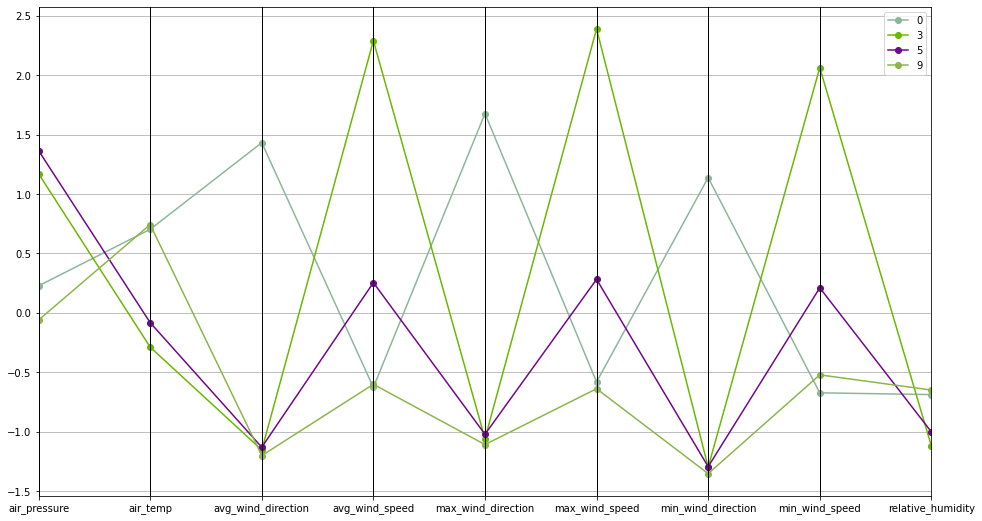

In [26]:
dry=centers_df.loc[centers_df.relative_humidity<=-0.5,:]
dry
paralell_coordinate(dry)

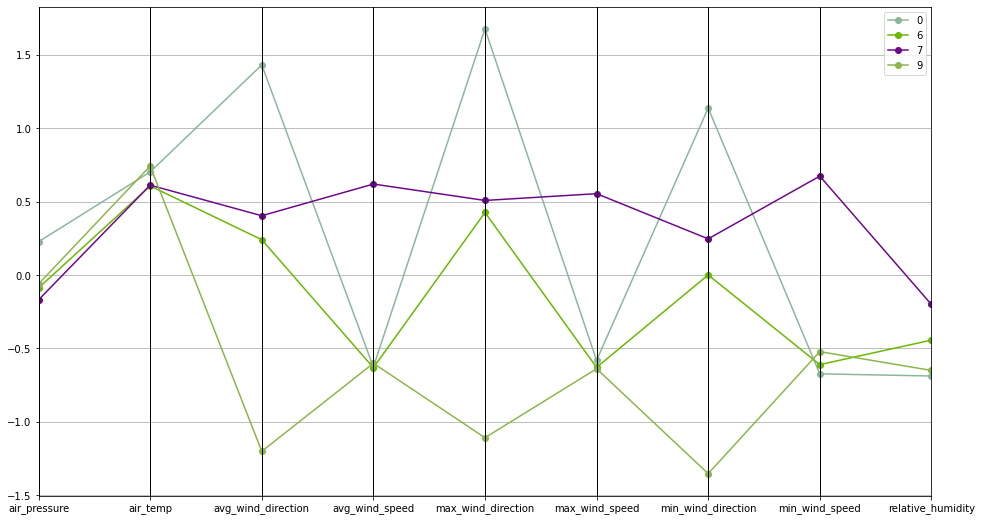

In [27]:
hot=centers_df.loc[centers_df.air_temp>0.5,:]
paralell_coordinate(hot)